In [1]:
from __future__ import division, print_function
import sys, os, glob, gc, warnings
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
import matplotlib.pyplot as plt

import healpy as hp

from desiutil.plots import init_sky, plot_sky_binned

In [2]:
# params = {'legend.fontsize': 'x-large',
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large',
#          'figure.facecolor':'w'} 
# plt.rcParams.update(params)

In [3]:
hp_table_south = Table.read('data/sky_residual_dr8_south_64.txt', format='ascii.commented_header')
hp_table_north = Table.read('data/sky_residual_dr8_north_64.txt', format='ascii.commented_header')

hp_table_combine = hp_table_south.copy()
hp_table_combine['ra'], hp_table_combine['dec'] = hp.pixelfunc.pix2ang(64, hp_table_combine['hp_idx'], lonlat=True)

mask = hp_table_combine['dec'] > 32.375
hp_table_combine[mask] = hp_table_north[mask]

# hp_mask = hp_table_combine['count'] > 50
# # hp_mask &= hp_table_combine['dec'] > -30

In [5]:
col_list = ['count', 'g_sky', 'r_sky', 'z_sky']
clip_lo_list = [0, -0.003, -0.004, -0.006]
clip_hi_list = [None, 0.003, 0.004, 0.006]

cmap_list = ['jet', 'seismic', 'seismic', 'seismic']

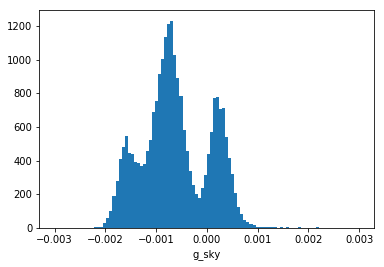

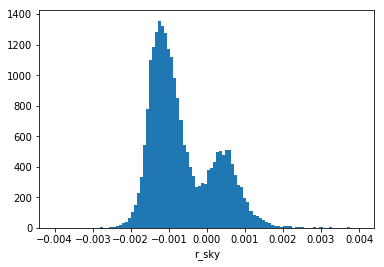

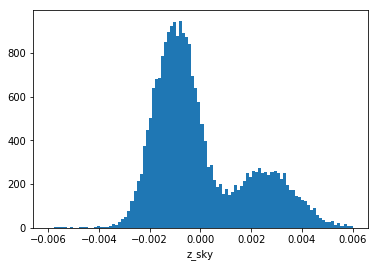

In [6]:
for col, clip_lo, clip_hi in zip(col_list, clip_lo_list, clip_hi_list):
    if col=='count':
        continue 
    v = hp_table_combine[col]
    plt.hist(v[np.isfinite(v)], 100, range=(clip_lo, clip_hi))
    plt.xlabel(col)
    plt.show()

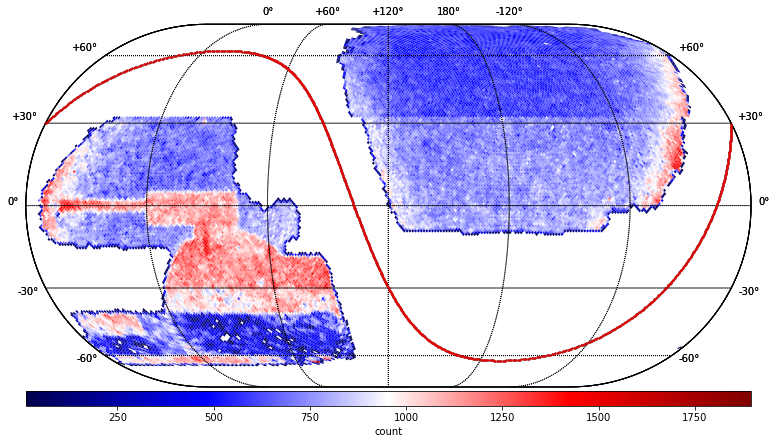

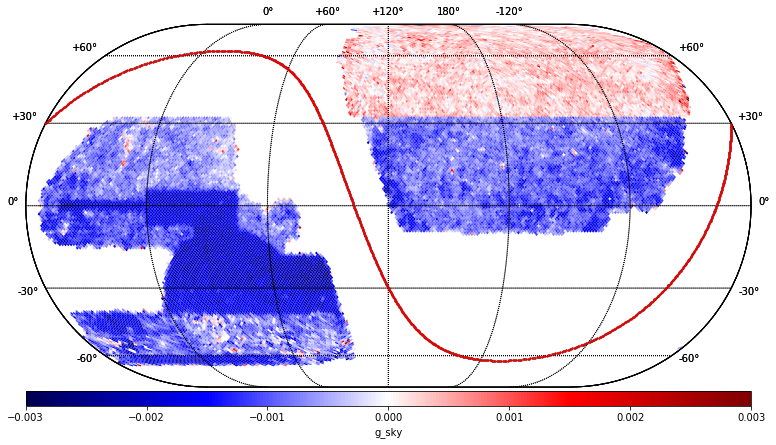

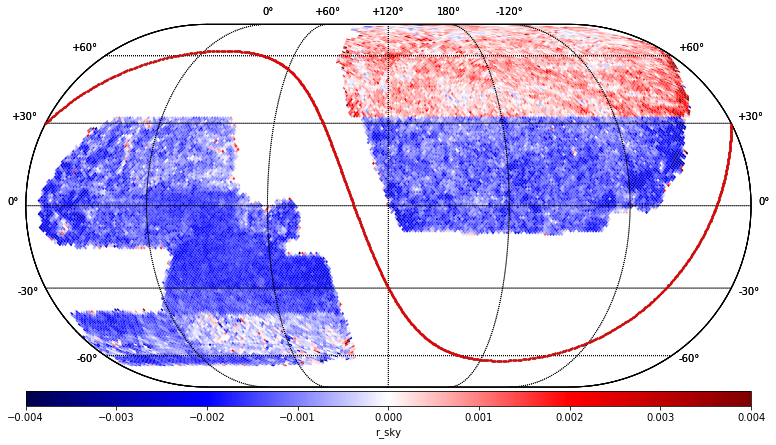

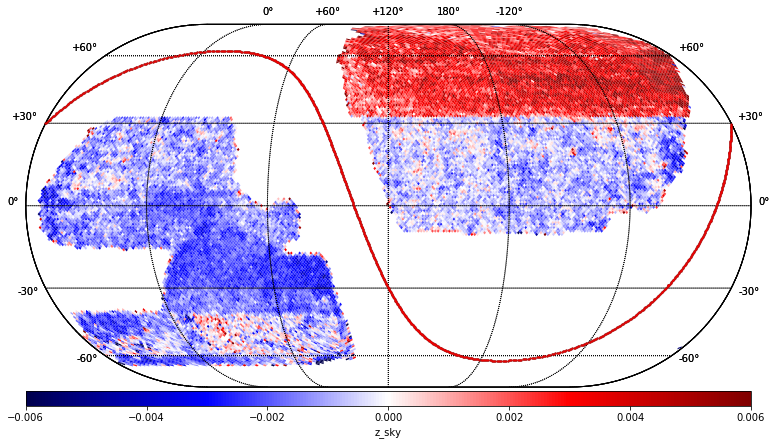

In [7]:
for col, clip_lo, clip_hi in zip(col_list, clip_lo_list, clip_hi_list):
    fig, ax = plt.subplots(1, figsize=(13, 8))
    ax = np.atleast_1d(ax)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        basemap = init_sky(galactic_plane_color='k', ax=ax[0])
        plot_sky_binned(hp_table_combine['ra'], hp_table_combine['dec'], weights=hp_table_combine[col], 
                       cmap='seismic', plot_type='healpix', label=col, clip_lo=clip_lo, clip_hi=clip_hi, max_bin_area=3)
    plt.show()